TAXA DE RETORNO SIMPLES

In [1]:
# RS = (preço final - preço inicial) / preço inicial
# Esse é o cálculo para uma ação. Para todas, deve-se considerar o pagamento à corretora e a taxa de câmbio

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
dataset = pd.read_csv('acoes.csv')

In [4]:
dataset.shape

(2292, 7)

In [5]:
dataset['GOL'][0], dataset['GOL'][len(dataset) - 1]

(14.989999771118164, 1.3200000524520874)

In [6]:
dataset['GOL'].shift(2)

0         NaN
1         NaN
2       14.99
3       14.85
4       15.21
        ...  
2287     1.37
2288     1.35
2289     1.25
2290     1.18
2291     1.22
Name: GOL, Length: 2292, dtype: float64

In [7]:
dataset['RS GOL'] = (dataset['GOL'] / dataset['GOL'].shift(1)) - 1

In [8]:
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS GOL
0,2015-01-02,14.99,12.527681,5.923076,0.217754,11.881510,47.259998,NaN
1,2015-01-05,14.85,12.362843,5.963461,0.221847,11.516435,46.320000,-0.009340
2,2015-01-06,15.21,12.198006,5.875000,0.218924,10.796243,46.580002,0.024242
3,2015-01-07,14.55,12.090861,5.807692,0.226231,10.719909,48.150002,-0.043392
4,2015-01-08,14.27,11.662282,5.905769,0.224477,10.968824,48.509998,-0.019244
...,...,...,...,...,...,...,...,...
2287,2024-04-24,1.25,2.000000,38.230000,1.430000,28.110001,120.970001,-0.074074
2288,2024-04-25,1.18,2.010000,38.669998,1.390000,27.959999,120.910004,-0.056000
2289,2024-04-26,1.22,2.010000,39.220001,1.430000,28.080000,122.830002,0.033898
2290,2024-04-29,1.31,2.080000,39.360001,1.450000,27.950001,123.769997,0.073770


<Axes: >

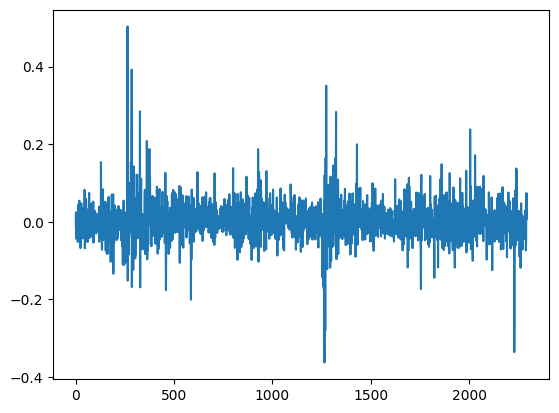

In [9]:
dataset['RS GOL'].plot()

In [10]:
dataset['RS GOL'].mean()

0.00012344830440132434

In [11]:
# A bolsa funciona em 246 dias. O valor abaixo é a taxa anual de retorno simples
(dataset['RS GOL'].mean() * 246) / 100

0.0003036828288272579

In [12]:
dataset['RS CVC'] = (dataset['CVC'] / dataset['CVC'].shift(1)) - 1
dataset['RS WEGE'] = (dataset['WEGE'] / dataset['WEGE'].shift(1)) - 1
dataset['RS MGLU'] = (dataset['MGLU'] / dataset['MGLU'].shift(1)) - 1
dataset['RS TOTS'] = (dataset['TOTS'] / dataset['TOTS'].shift(1)) - 1
dataset['RS BOVA'] = (dataset['BOVA'] / dataset['BOVA'].shift(1)) - 1


In [13]:
(dataset['RS CVC'].mean() * 246) * 100

-0.7651310388459627

In [14]:
(dataset['RS WEGE'].mean() * 246) * 100

26.02414419294943

In [15]:
(dataset['RS MGLU'].mean() * 246) * 100

42.305425991792745

In [16]:
(dataset['RS TOTS'].mean() * 246) * 100

16.40329277047542

In [17]:
(dataset['RS BOVA'].mean() * 246) * 100

13.297829946994504

TAXA DE RETORNO LOGARITMICA

In [18]:
# Serve para comparar a taxa de retorno em periodos diferentes para uma mesma ação
# RL = log(preço final/ preço inicial) * 100
# RETORNO SIMPLES É PARA COMPARAR EMPRESAS DIFERENTES

In [19]:
dataset['GOL'][0], dataset['GOL'][len(dataset) - 1]

(14.989999771118164, 1.3200000524520874)

In [20]:
np.log(dataset['GOL'][len(dataset) -1] / dataset['GOL'][0]) * 100

-242.97515205108294

In [21]:
np.log(dataset['WEGE'][len(dataset) -1] / dataset['WEGE'][0]) * 100

189.36400017406697

In [22]:
np.log(dataset['MGLU'][len(dataset) -1] / dataset['MGLU'][0]) * 100

183.92000077230637

In [23]:
np.log(dataset['TOTS'][len(dataset) -1] / dataset['TOTS'][0]) * 100

84.75314513270563

In [24]:
np.log(dataset['BOVA'][len(dataset) -1] / dataset['BOVA'][0]) * 100

95.17935042225999

In [25]:
dataset['RL GOL'] = np.log(dataset['GOL'] / dataset['GOL'].shift(1)) 
dataset['RL CVC'] = np.log(dataset['CVC'] / dataset['CVC'].shift(1)) 
dataset['RL WEGE'] = np.log(dataset['WEGE'] / dataset['WEGE'].shift(1))
dataset['RL MGLU'] = np.log(dataset['MGLU'] / dataset['MGLU'].shift(1))
dataset['RL TOTS'] = np.log(dataset['TOTS'] / dataset['TOTS'].shift(1))
dataset['RL BOVA'] = np.log(dataset['BOVA'] / dataset['BOVA'].shift(1))

In [26]:
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS GOL,RS CVC,RS WEGE,RS MGLU,RS TOTS,RS BOVA,RL GOL,RL CVC,RL WEGE,RL MGLU,RL TOTS,RL BOVA
0,2015-01-02,14.99,12.527681,5.923076,0.217754,11.881510,47.259998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.85,12.362843,5.963461,0.221847,11.516435,46.320000,-0.009340,-0.013158,0.006818,0.018796,-0.030726,-0.019890,-0.009383,-0.013245,0.006795,0.018622,-0.031208,-0.020090
2,2015-01-06,15.21,12.198006,5.875000,0.218924,10.796243,46.580002,0.024242,-0.013333,-0.014834,-0.013176,-0.062536,0.005613,0.023953,-0.013423,-0.014945,-0.013263,-0.064577,0.005597
3,2015-01-07,14.55,12.090861,5.807692,0.226231,10.719909,48.150002,-0.043392,-0.008784,-0.011457,0.033377,-0.007070,0.033705,-0.044362,-0.008823,-0.011523,0.032832,-0.007096,0.033150
4,2015-01-08,14.27,11.662282,5.905769,0.224477,10.968824,48.509998,-0.019244,-0.035447,0.016887,-0.007753,0.023220,0.007477,-0.019432,-0.036090,0.016746,-0.007783,0.022954,0.007449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,2024-04-24,1.25,2.000000,38.230000,1.430000,28.110001,120.970001,-0.074074,-0.038462,0.006317,-0.006945,-0.010560,-0.003624,-0.076961,-0.039221,0.006298,-0.006969,-0.010616,-0.003631
2288,2024-04-25,1.18,2.010000,38.669998,1.390000,27.959999,120.910004,-0.056000,0.005000,0.011509,-0.027972,-0.005336,-0.000496,-0.057629,0.004988,0.011444,-0.028371,-0.005351,-0.000496
2289,2024-04-26,1.22,2.010000,39.220001,1.430000,28.080000,122.830002,0.033898,0.000000,0.014223,0.028777,0.004292,0.015880,0.033336,0.000000,0.014123,0.028371,0.004283,0.015755
2290,2024-04-29,1.31,2.080000,39.360001,1.450000,27.950001,123.769997,0.073770,0.034826,0.003570,0.013986,-0.004630,0.007653,0.071176,0.034233,0.003563,0.013889,-0.004640,0.007624


<Axes: >

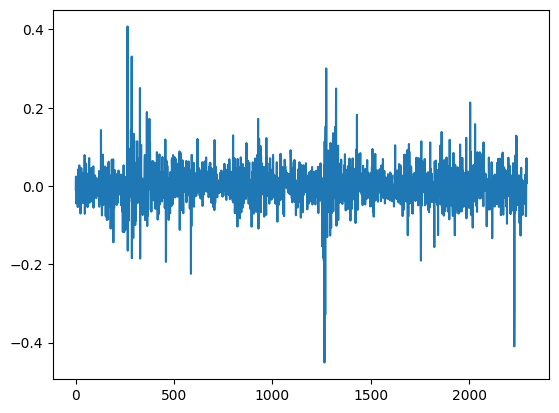

In [27]:
dataset['RL GOL'].plot()

In [28]:
(dataset['RL GOL'].mean() * 246) * 100

-26.089867919932995

TAXA DE RETORNO PARA CARTEIRA DE AÇÕES EM COMPARAÇÃO COM A CARTEIRA BOVA

In [30]:
dataset = pd.read_csv('acoes.csv')

In [31]:
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,12.527681,5.923076,0.217754,11.881510,47.259998
1,2015-01-05,14.85,12.362843,5.963461,0.221847,11.516435,46.320000
2,2015-01-06,15.21,12.198006,5.875000,0.218924,10.796243,46.580002
3,2015-01-07,14.55,12.090861,5.807692,0.226231,10.719909,48.150002
4,2015-01-08,14.27,11.662282,5.905769,0.224477,10.968824,48.509998
...,...,...,...,...,...,...,...
2287,2024-04-24,1.25,2.000000,38.230000,1.430000,28.110001,120.970001
2288,2024-04-25,1.18,2.010000,38.669998,1.390000,27.959999,120.910004
2289,2024-04-26,1.22,2.010000,39.220001,1.430000,28.080000,122.830002
2290,2024-04-29,1.31,2.080000,39.360001,1.450000,27.950001,123.769997


In [32]:
# CADA COLUNA FOI NORMALIZADA EM RELAÇÃO AO PRIMEIRO VALOR DE CADA UMA
dataset_normalizado = dataset.copy()
for i in dataset_normalizado.columns[1:]:
    dataset_normalizado[i] = (dataset_normalizado[i] / dataset_normalizado[i][0])

<Axes: xlabel='Date'>

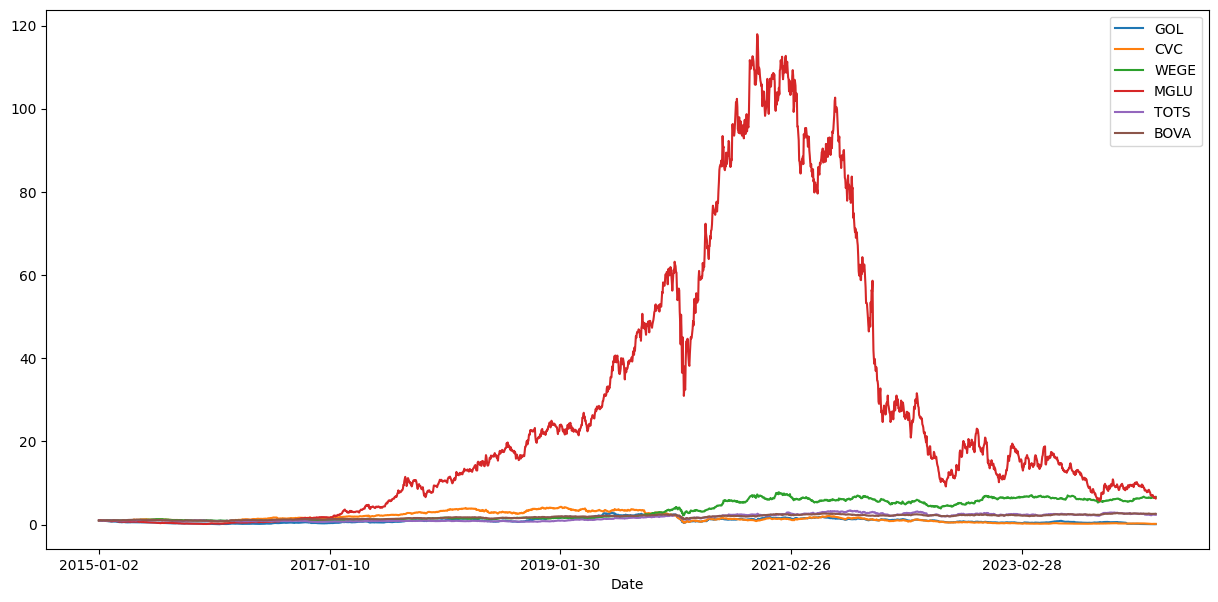

In [33]:
dataset_normalizado.plot(x = 'Date', figsize=(15,7))

In [34]:
dataset_normalizado.drop(labels=['Date'], axis=1, inplace=True)

In [35]:
# CALCULANDO TAXA DE RETORNO SIMPLES
# ESSA TAXA SERVE PARA COMPARAR AÇÕES DIFERENTES. LOG É PARA A MESMA AÇÃO EM PERIODOS DIFERENTES
retorno_carteira = (dataset_normalizado / dataset_normalizado.shift(1)) - 1


In [36]:
retorno_carteira.head()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018796,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014834,-0.013176,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011457,0.033377,-0.007070,0.033705
4,-0.019244,-0.035447,0.016887,-0.007753,0.023220,0.007477


In [37]:
retorno_anual = retorno_carteira.mean() * 246
retorno_anual

GOL     0.030368
CVC    -0.007651
WEGE    0.260241
MGLU    0.423054
TOTS    0.164033
BOVA    0.132978
dtype: float64

In [38]:
retorno_anual = retorno_anual * 100
retorno_anual

GOL      3.036828
CVC     -0.765131
WEGE    26.024144
MGLU    42.305426
TOTS    16.403293
BOVA    13.297830
dtype: float64

In [39]:
# É PRECISO DEFINIR PESOS PARA CASA AÇAO DENTRO DA CARTEIRA
# FORAM CONSIDERADOS PESOS IGUAIS DE 0,2 PARA GOL ATÉ TOTS
# BOVA VAI SER COMPARADA COM A CARTEIRA GOL-CVC-WEGE-MGLU-TOTS-BOVA

In [40]:
pesos_carteira1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])
pesos_carteira1.sum()

1.0

In [41]:
# Fazendo multiplicação e soma
# Nota-se que é melhor investir no fundo do que na BOVA (É uma carteira montada pelas melhores empresas do Brasil)
np.dot(retorno_anual, pesos_carteira1)

17.40091204092884

In [42]:
pesos_carteira2 = np.array([0.1, 0.2, 0.2, 0.4, 0.1, 0.0])
pesos_carteira2.sum()

1.0

In [43]:
np.dot(retorno_anual, pesos_carteira2)

23.9179851334126

GRÁFICO DA CARTEIRA X BOVA

In [44]:
dataset_normalizado = dataset.copy()
for i in dataset_normalizado.columns[1:]:
    dataset_normalizado[i] = (dataset_normalizado[i] / dataset_normalizado[i][0])

In [45]:
dataset_normalizado['CARTEIRA'] = (dataset_normalizado['GOL'] + dataset_normalizado['CVC'] + dataset_normalizado['WEGE'] + dataset_normalizado['MGLU'] + dataset_normalizado['TOTS']) / 5

In [46]:
dataset_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,CARTEIRA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018796,0.969274,0.980110,0.994478
2,2015-01-06,1.014676,0.973684,0.991883,1.005373,0.908659,0.985612,0.978855
3,2015-01-07,0.970647,0.965132,0.980520,1.038929,0.902235,1.018832,0.971492
4,2015-01-08,0.951968,0.930921,0.997078,1.030874,0.923184,1.026449,0.966805
...,...,...,...,...,...,...,...,...
2287,2024-04-24,0.083389,0.159646,6.454416,6.567043,2.365861,2.559670,3.126071
2288,2024-04-25,0.078719,0.160445,6.528702,6.383350,2.353236,2.558401,3.100890
2289,2024-04-26,0.081388,0.160445,6.621560,6.567043,2.363336,2.599027,3.158754
2290,2024-04-29,0.087392,0.166032,6.645196,6.658890,2.352395,2.618917,3.181981


In [47]:
figura = px.line(title = 'Comparativo carteira x BOVA')
for i in dataset_normalizado.columns[1:]:
    figura.add_scatter(x = dataset_normalizado['Date'], y = dataset_normalizado[i], name = i)
figura.show()


####################
# Nota-se a carteira melhor que a BOVA

In [49]:
dataset_normalizado.drop(labels=['GOL', 'CVC', 'WEGE', 'MGLU', 'TOTS'], axis=1, inplace=True)

In [ ]:
figura = px.line(title = 'Comparativo carteira x BOVA')
for i in dataset_normalizado.columns[1:]:
    figura.add_scatter(x = dataset_normalizado['Date'], y = dataset_normalizado[i], name = i)
figura.show()